In [67]:
from scipy.stats import wasserstein_distance
from utils import Array
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [68]:
df  = pd.read_csv('DataBase.csv')
df.head()

,device,kernel
0,"{'time': 49.463, 's2': {'ax': -0.08379706, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
1,"{'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
2,"{'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
3,"{'time': 49.543, 's2': {'ax': -0.07900865, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
4,"{'time': 49.563, 's2': {'ax': -0.04309563, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."


# TRATAMENTO DE DADOS

In [69]:
df = df.head(20000).copy()

In [70]:
device = df.device.apply(ast.literal_eval).apply(pd.Series)
device

,time,s2,s1
0,49.463,"{'ax': -0.08379706, 'ay': 0.6105214, 'wz': -0....","{'ax': -0.09816227, 'ay': 0.581791, 'wz': -0.0..."
1,49.523,"{'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...","{'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0...."
2,49.523,"{'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...","{'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0...."
3,49.543,"{'ax': -0.07900865, 'ay': 0.6847417, 'wz': -0....","{'ax': -0.05506664, 'ay': 1.223437, 'wz': -0.0..."
4,49.563,"{'ax': -0.04309563, 'ay': 0.5865794, 'wz': -0....","{'ax': -0.07900865, 'ay': 0.5770026, 'wz': -0...."
...,...,...,...
3761,96.693,"{'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...","{'ax': -0.002394202, 'ay': -0.3902549, 'wz': -..."
3762,96.693,"{'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...","{'ax': -0.002394202, 'ay': -0.3902549, 'wz': -..."
3763,96.713,"{'ax': -0.004788403, 'ay': -0.002394202, 'wz':...","{'ax': -0.02873042, 'ay': -0.3280056, 'wz': -0..."
3764,96.733,"{'ax': -0.02394202, 'ay': -0.4668693, 'wz': -0...","{'ax': -0.05027823, 'ay': -0.4668693, 'wz': -0..."


In [71]:
kernel = df.kernel.apply(ast.literal_eval).apply(pd.Series)
kernel

,pitch,roll,yaw,wx,wy,wz,ax,ay,az
0,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
1,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
2,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
3,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
4,0.00,0.00,0.00,1.0,2.0,-3.0,-100.0,-54.0,484.0
...,...,...,...,...,...,...,...,...,...
3761,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3762,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3763,-0.16,6.28,348.97,-2.0,-8.0,-2.0,-54.0,1.0,496.0
3764,-0.16,6.28,348.97,-4.0,5.0,0.0,-50.0,5.0,499.0


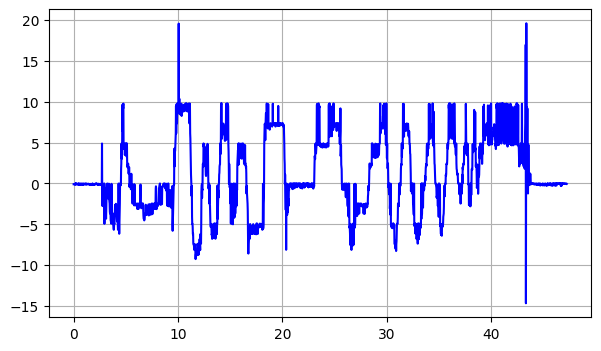

In [72]:
device['time'] = device.time - device.time.values[0]

plt.figure(figsize=(7, 4))
plt.plot(device.time, [data['ax'] for data in device['s1']], color='blue')
plt.grid()

In [73]:
print(float(np.round(device.time.diff().median(), 3)))
dt = 0.020

0.02


# LIMITES

In [74]:
SAMPLE_RANGE = (10, 40)
kernel['time'] = device.time

device = device.copy().loc[(device.time >= SAMPLE_RANGE[0]) & (device.time <= SAMPLE_RANGE[1])]
kernel = kernel.copy().loc[(kernel.time >= SAMPLE_RANGE[0]) & (kernel.time <= SAMPLE_RANGE[1])]

device['time'] = device.time - device.time.values[0]
kernel['time'] = kernel.time - kernel.time.values[0]

In [75]:
device.head()

,time,s2,s1
790,0.00,"{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.112...","{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.103..."
791,0.00,"{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.112...","{'ax': 8.880095, 'ay': -4.611232, 'wz': -0.103..."
792,0.02,"{'ax': 9.452309, 'ay': -4.754885, 'wz': -0.072...","{'ax': 9.495404, 'ay': -4.752491, 'wz': -0.103..."
793,0.04,"{'ax': 9.746795, 'ay': -4.311957, 'wz': 0.0638...","{'ax': 9.703699, 'ay': -4.302381, 'wz': 0.0510..."
794,0.04,"{'ax': 9.746795, 'ay': -4.311957, 'wz': 0.0638...","{'ax': 9.703699, 'ay': -4.302381, 'wz': 0.0510..."


In [76]:
kernel.head()

,pitch,roll,yaw,wx,wy,wz,ax,ay,az,time
790,26.60,-49.98,307.93,722.0,-2628.0,-106.0,221.0,174.0,265.0,0.00
791,27.80,-55.47,306.93,716.0,-2374.0,-239.0,301.0,160.0,237.0,0.00
792,28.77,-60.41,305.73,704.0,-2019.0,-36.0,299.0,224.0,184.0,0.02
793,29.37,-64.83,304.39,558.0,-1732.0,74.0,340.0,213.0,115.0,0.04
794,29.37,-64.83,304.39,558.0,-1732.0,74.0,340.0,213.0,115.0,0.04


# ANÁLISE

In [77]:
sensor = 's1'
key    = 'ax'

kernelData = np.array(kernel[key])
sensorData = np.array([s[key] for s in device[sensor]])

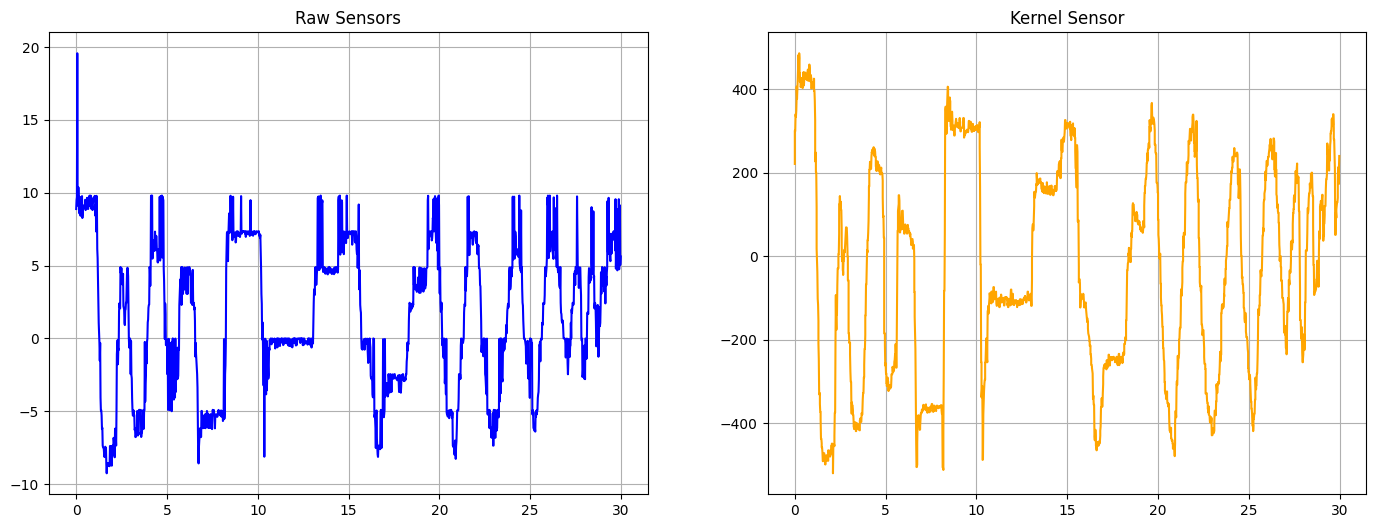

In [78]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(device.time, sensorData, color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kernel.time, kernelData, color='orange')
plt.title('Kernel Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

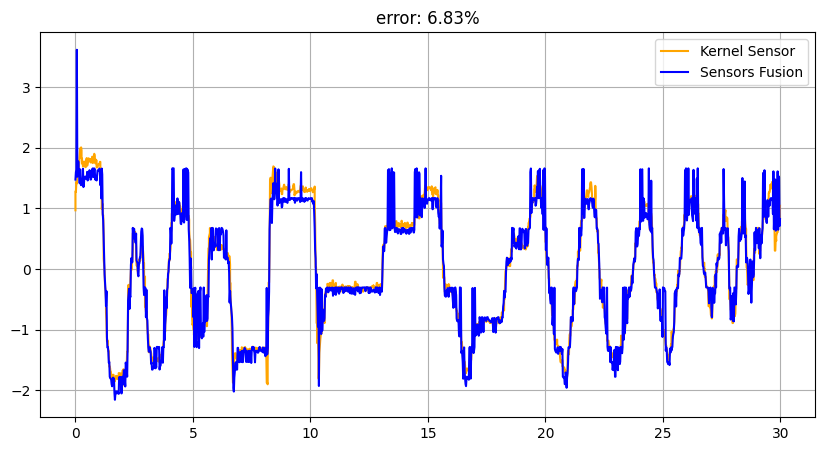

In [79]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


k, s, score = compare(kernelData, sensorData)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# ALGORITMO DE FUSÃO
    ### FUSÃO COVARIANCE INTERSECTION (CI)
- x1, x2: estimativas escalares (valores de entrada)
- p1, p2: variâncias (incerteza de medida)
- w: parâmetro de fusão (confiança na entrada x1) -> valores entre [0, 1] (100%)
- Retorna (xf, pf): estimativa fundida e variância fundida

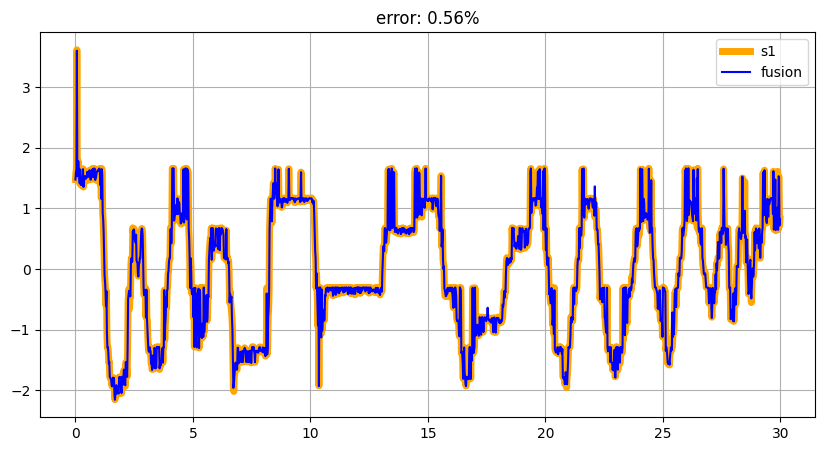

In [80]:
class CovarianceIntersection:
    def fuse(self, data1, data2, w=0.5):
        x1 = data1.get(0)
        p1 = data1.get(1)
        x2 = data2.get(0)
        p2 = data2.get(1)

        p1_inv = 1.0 / p1
        p2_inv = 1.0 / p2

        pf_inv = p1_inv * w + p2_inv * (1.0 - w)
        pf     = 1.0 / pf_inv

        xf = (x1 * (p1_inv * w) + x2 * (p2_inv * (1.0 - w))) * pf
        return xf, pf


ci = CovarianceIntersection()
yModel = []

for i, row in device.iterrows():
    data1 = Array([row.s1[key], 4.0])
    data2 = Array([row.s2[key], 3.5])
    
    v, e = ci.fuse(data1, data2, w=0.4)
    yModel.append(v)


k, s, score = compare(sensorData, yModel)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label=sensor, linewidth=5)
plt.plot(device.time, s, color='blue',  label='fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# COMPARANDO DADOS

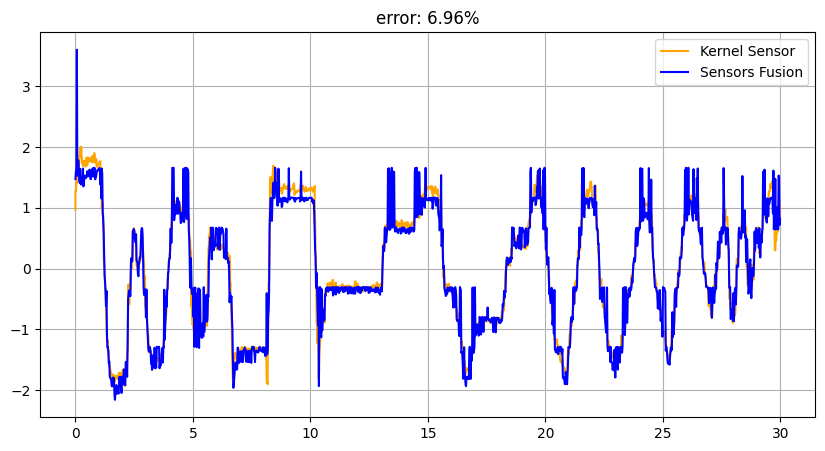

In [81]:
k, s, score = compare(kernelData, yModel)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()